In [2]:
%%bash
if [ ! -d ".git" ]; then
    rm -rf * .*; #Get rid of Colab's default junk files
    git clone -b main https://github.com/Firefly2024/Diffusion-Illusions .
fi

In [3]:
%pip install --upgrade -r requirements.txt
%pip install rp --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 108.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 98.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.47.1
    Uninstalling transformers-4.47.1:
      Successfully uninstalled transformers-4.47.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 70.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.7 MB/s eta 0:00:00
  Created wheel for rp: filename=rp-0.1.1123-py3-none-any.whl size=2896477 sha256=6f8f088acc5de0cdf7416033756ceed780c42ef83b1ec4340f2d1eae2aadd772
  Stored in directory: /root/.cache/pip/wheels/96/5b/72/7ecbcb51fd963917202188c0972a3ae53e7d2433d95fd47393
Successfully built rp


In [4]:
import torch
from PIL import Image
from diffusers import (
    AutoencoderKL,
    ControlNetModel,
    StableDiffusionControlNetPipeline,
    StableDiffusionControlNetImg2ImgPipeline,
    DPMSolverMultistepScheduler,
    EulerDiscreteScheduler
)

# Prepare models, build pipeline

BASE_MODEL = "SG161222/Realistic_Vision_V5.1_noVAE"
CONTROLNET_MODEL = "monster-labs/control_v1p_sd15_qrcode_monster"
VAE_MODEL = "stabilityai/sd-vae-ft-mse"

vae = AutoencoderKL.from_pretrained(VAE_MODEL, torch_dtype=torch.float16)

controlnet = ControlNetModel.from_pretrained(CONTROLNET_MODEL, torch_dtype=torch.float16)

scheduler = EulerDiscreteScheduler.from_pretrained(BASE_MODEL, subfolder="scheduler")

main_pipe = StableDiffusionControlNetPipeline.from_pretrained(
    BASE_MODEL,
    controlnet=controlnet,
    vae=vae,
    torch_dtype=torch.float16,
    scheduler=scheduler
).to("cuda")

image_pipe = StableDiffusionControlNetImg2ImgPipeline(
    **main_pipe.components
).to("cuda")

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/xformers/__init__.py", line 57, in _is_triton_available
    import triton  # noqa
ModuleNotFoundError: No module named 'triton'
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/955 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.55k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet_img2img.StableDiffusionControlNetImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [6]:
# Preprocess control_image

def center_crop_resize(img: Image.Image, size=(512, 512)) -> Image.Image:
    w, h = img.size
    new_side = min(w, h)
    left = (w - new_side) // 2
    top = (h - new_side) // 2
    right = left + new_side
    bottom = top + new_side
    img_cropped = img.crop((left, top, right, bottom))
    img_resized = img_cropped.resize(size, resample=Image.Resampling.LANCZOS)
    return img_resized

control_image = Image.open("example_images/zheng.jpg").convert("RGB")
control_image_512 = center_crop_resize(control_image, (512, 512))
control_image_1024 = center_crop_resize(control_image, (1024, 1024))

In [22]:
# Get the latent of the image

prompt = "Cyberpunk-style city streetscape"
negative_prompt = "low quality, ugly, blurry"
guidance_scale = 7.5
controlnet_conditioning_scale = 2.0
num_inference_steps = 30

seed = 1234
generator = torch.Generator("cuda").manual_seed(seed)


main_pipe.scheduler = EulerDiscreteScheduler.from_config(main_pipe.scheduler.config)

out = main_pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    image=control_image_512,
    guidance_scale=guidance_scale,
    controlnet_conditioning_scale=controlnet_conditioning_scale,
    num_inference_steps=num_inference_steps,
    generator=generator,
    output_type="latent"
)

latent_512 = out["images"]

  0%|          | 0/30 [00:00<?, ?it/s]

In [23]:
# Map the latent back to the image space to obtain the final image.

import torch.nn.functional as F

def upscale_latent(latent, scale_factor=2):
    _, c, h, w = latent.shape
    new_h, new_w = h*scale_factor, w*scale_factor
    upscaled = F.interpolate(latent, size=(new_h, new_w), mode="nearest")
    return upscaled

latent_1024 = upscale_latent(latent_512, scale_factor=2)

num_inference_steps_2 = 20
upscaler_strength = 0.5

out_2 = image_pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    image=latent_1024,
    control_image=control_image_1024,
    guidance_scale=guidance_scale,
    controlnet_conditioning_scale=controlnet_conditioning_scale,
    num_inference_steps=num_inference_steps_2,
    strength=upscaler_strength,
    generator=generator
)

final_image = out_2["images"][0]

  0%|          | 0/10 [00:00<?, ?it/s]

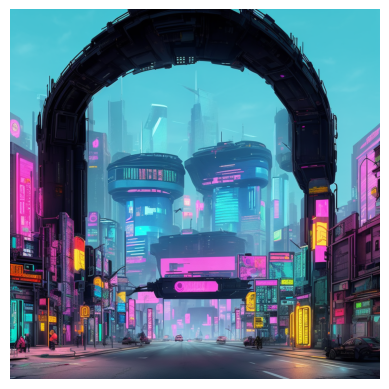

In [24]:
import matplotlib.pyplot as plt

plt.imshow(final_image)
plt.axis('off')
plt.show()
# final_image.save("final_illusion_result.png")